## Importing necessary libraries 

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/amanc/Downloads/archive (1)/KAG_conversion_data.csv")

In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
display(df)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


 Checking for NULL values

In [5]:
df.isnull().values.any()

False

In [6]:
print(df.dtypes, '\n', len(df['ad_id']) == len(df['ad_id'].unique()))

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object 
 True


## Click To Conversion/Reach To Conversion Ratio

Adding click to conversion and reach to conversion ratios


<Axes: xlabel='Ratio '>

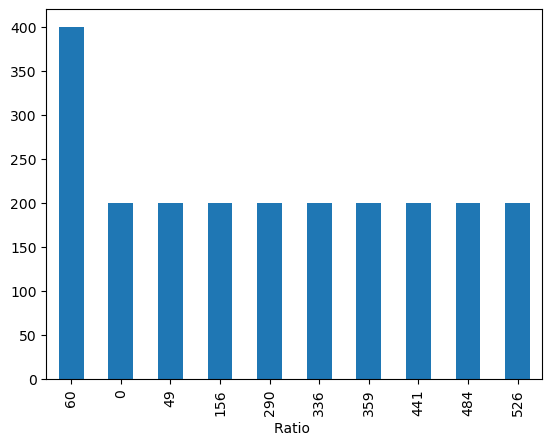

In [7]:
#removing 0 click ads
ratios = df[df['Clicks'] != 0]
ratios['clickToConversion'] = ratios['Total_Conversion']*100/ratios['Clicks']
ratios['reachToConversion'] = ratios['Total_Conversion']*100/ratios['Impressions']
highctc = ratios.sort_values(by = ['clickToConversion', 'Clicks'], ascending = False).head(10)
plta = (highctc['clickToConversion'].plot.bar())
plta.set_xlabel("Ad campaign ID")
plta.set_xlabel("Ratio ")
display(plta)

<Axes: xlabel='Ratio '>

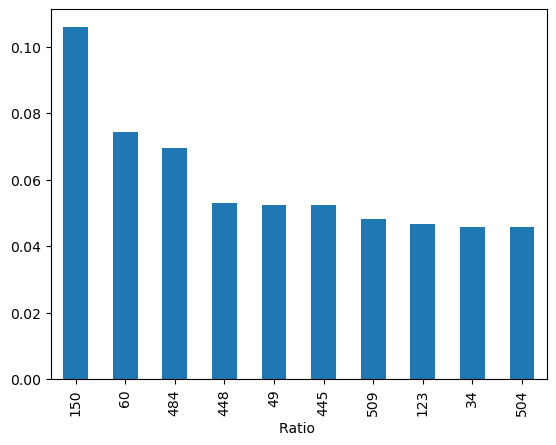

In [8]:

highrtc = ratios.sort_values(by = ['reachToConversion', 'Impressions'], ascending = False).head(10)

pltb = (highrtc['reachToConversion'].plot.bar())
pltb.set_xlabel("Ad campaign ID")
pltb.set_xlabel("Ratio ")
display(pltb)

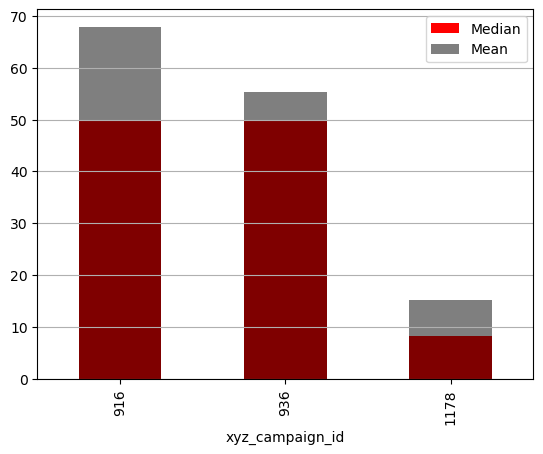

In [9]:
#campaign wise distribubtion
ideal_campaign = ratios.groupby(by = ['xyz_campaign_id'])
# ideal_campaign[].head(10).plot.bar()
plt1 = ideal_campaign['clickToConversion'].median().plot.bar(color = 'red')
plt2 = ideal_campaign['clickToConversion'].mean().plot.bar(color = 'black', alpha = 0.5)
plt.legend(['Median','Mean'])
plt.grid(which = 'both' , axis = 'y')
plt.show()

## Perfect Audience

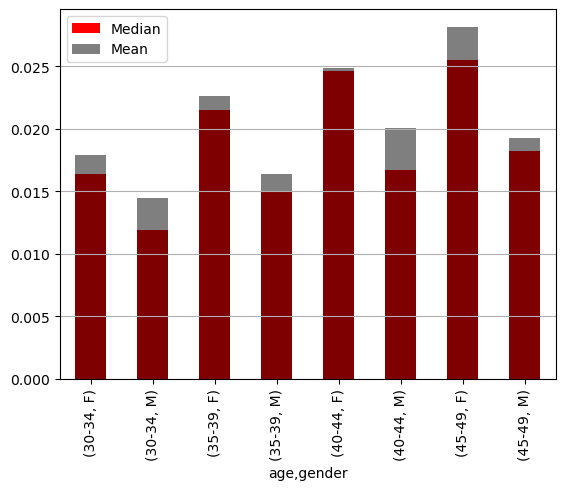

In [10]:
ratios['clickThroughRate'] = ratios['Clicks']*100/ratios['Impressions']
ideal_group = ratios.groupby(by=['age','gender'])
plt1 = ideal_group['clickThroughRate'].median().plot.bar(color = 'red')
plt2 = ideal_group['clickThroughRate'].mean().plot.bar(color = 'black', alpha = 0.5)
plt.legend(['Median','Mean'])
plt.grid(which = 'both' , axis = 'y')
plt.show()

## Individual Campaigns


In [11]:
fb_campaigns = ratios.groupby(by = ['fb_campaign_id'])

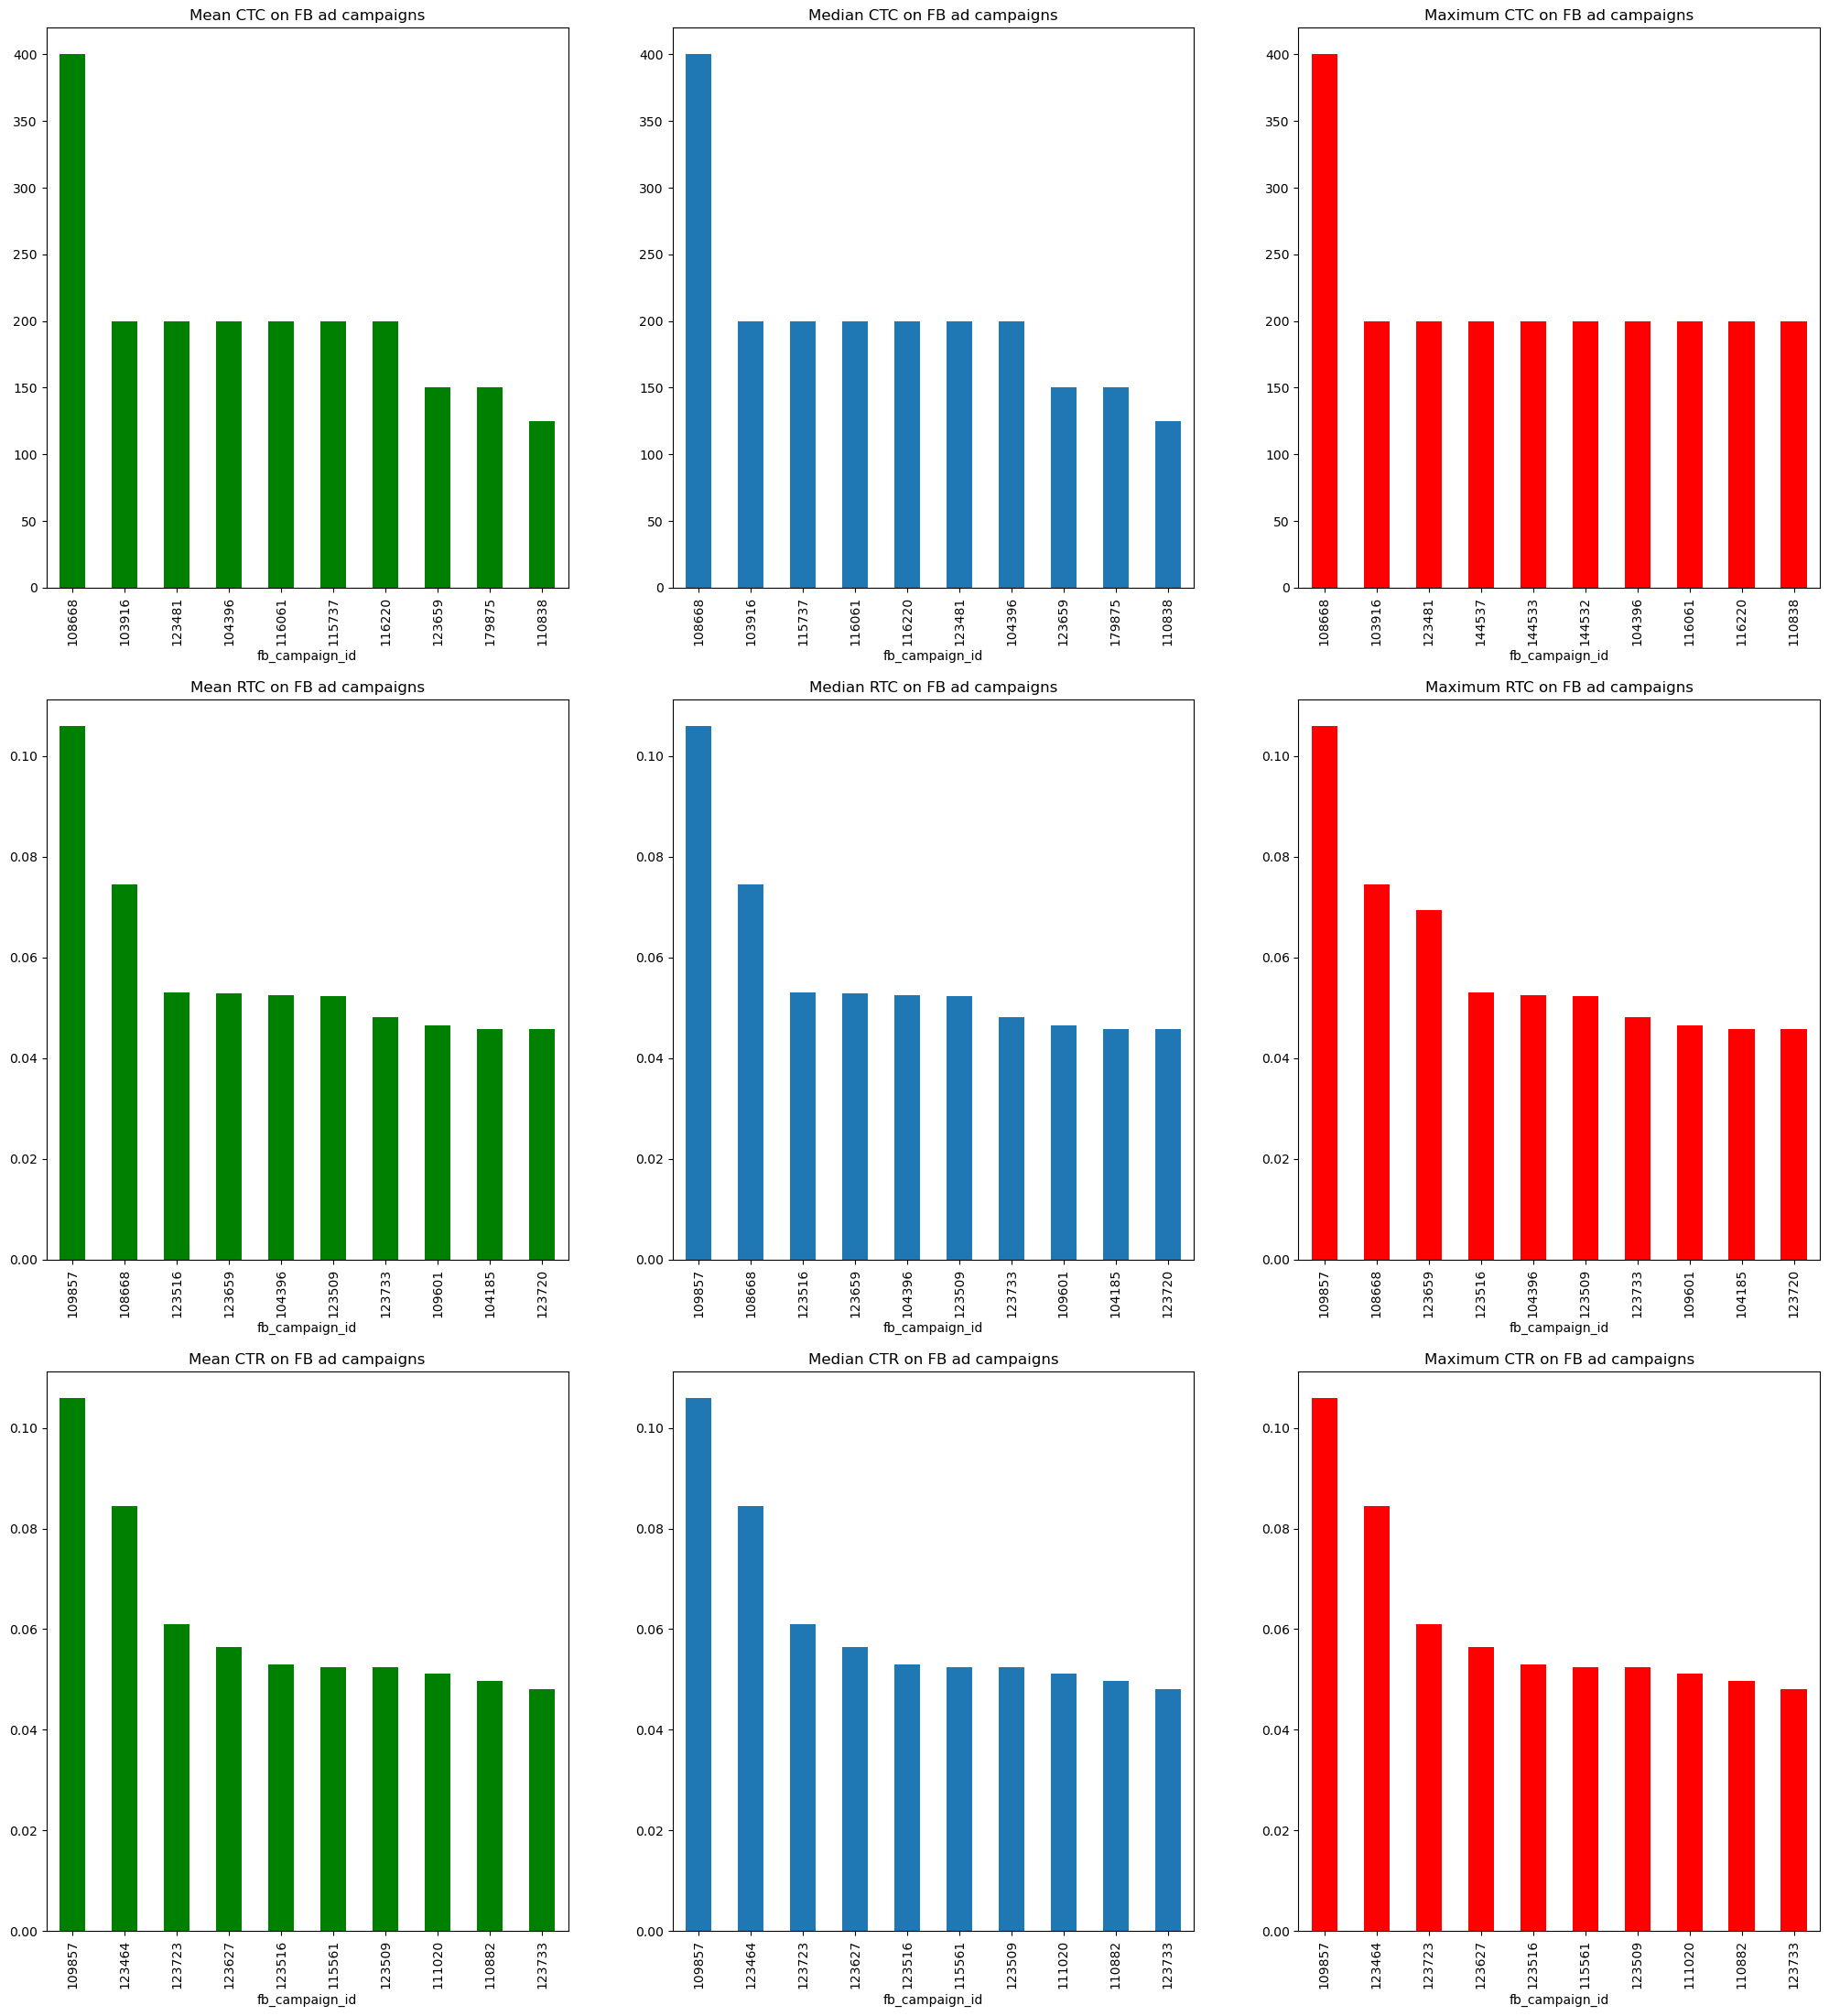

In [12]:
fig, axs = plt.subplots(3, 3, figsize = (25, 27))

fb_campaigns['clickToConversion'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[0, 0], color = 'green', label = 'Mean')
axs[0, 0].set_title("Mean CTC on FB ad campaigns")
fb_campaigns['clickToConversion'].median().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[0, 1])
axs[0, 1].set_title("Median CTC on FB ad campaigns")
fb_campaigns['clickToConversion'].max().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[0, 2], color = 'red')
axs[0, 2].set_title("Maximum CTC on FB ad campaigns")

fb_campaigns['reachToConversion'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[1, 0], color = 'green', label = 'Mean')
axs[1, 0].set_title("Mean RTC on FB ad campaigns")
fb_campaigns['reachToConversion'].median().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[1, 1])
axs[1, 1].set_title("Median RTC on FB ad campaigns")
fb_campaigns['reachToConversion'].max().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[1, 2], color = 'red')
axs[1, 2].set_title("Maximum RTC on FB ad campaigns")

fb_campaigns['clickThroughRate'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[2, 0], color = 'green', label = 'Mean')
axs[2, 0].set_title("Mean CTR on FB ad campaigns")
fb_campaigns['clickThroughRate'].median().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[2, 1])
axs[2, 1].set_title("Median CTR on FB ad campaigns")
fb_campaigns['clickThroughRate'].max().sort_values(ascending = False).head(10).plot(kind = 'bar', ax = axs[2, 2], color = 'red')
axs[2, 2].set_title("Maximum CTR on FB ad campaigns")

plt.show()

In [13]:
fb_campaigns['clickThroughRate'].mean().sort_values(ascending = False).head(10)

fb_campaign_id
109857    0.105932
123464    0.084495
123723    0.061031
123627    0.056529
123516    0.053079
115561    0.052466
123509    0.052383
111020    0.051144
110882    0.049801
123733    0.048146
Name: clickThroughRate, dtype: float64